In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('walmart-sales-dataset-of-45stores.csv')
df[['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','Unemployment']].describe()


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,14.313000


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

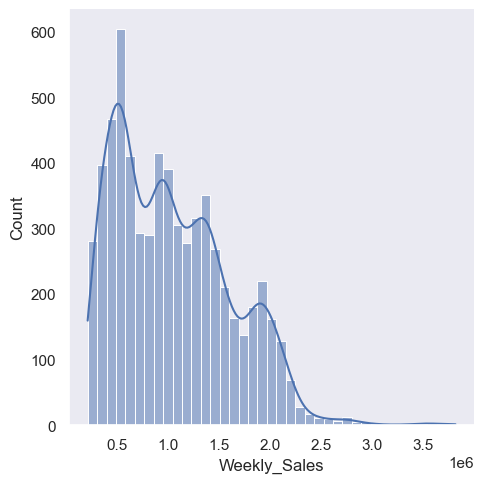

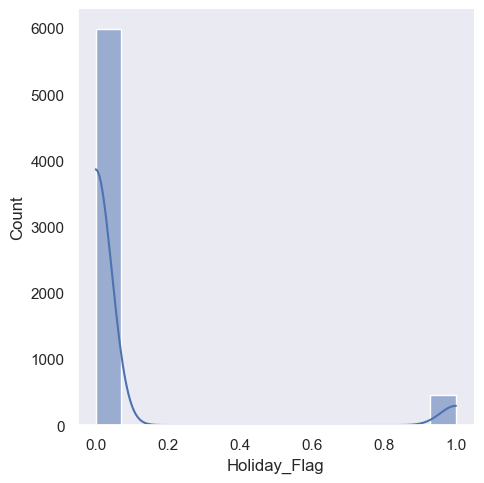

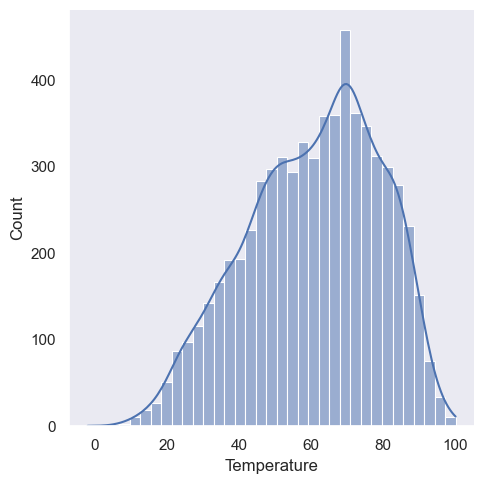

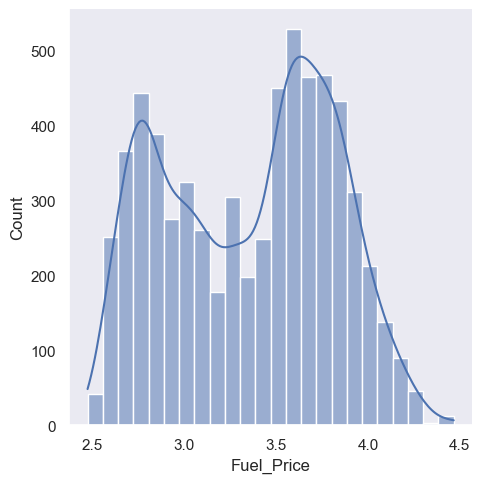

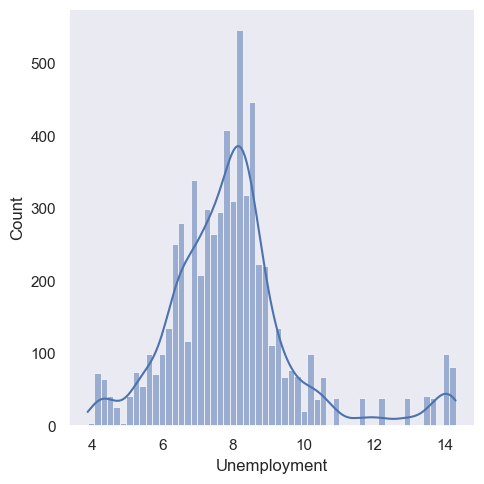

In [72]:
selecte_col=df[['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','Unemployment']]
for col in selecte_col:
    sns.displot(df[col], kde=True)

plt.tight_layout()
plt.show()

In [73]:
print(df.head(10))
df.info()

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   
5      1  12-03-2010    1439541.59             0        57.79       2.667   
6      1  19-03-2010    1472515.79             0        54.58       2.720   
7      1  26-03-2010    1404429.92             0        51.45       2.732   
8      1  02-04-2010    1594968.28             0        62.27       2.719   
9      1  09-04-2010    1545418.53             0        65.86       2.770   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4 

# data cleaning

In [74]:

df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.isnull().sum()



Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### this data set have no null value tell see the duplicates rows

In [75]:
df.duplicated().sum()


0

### this means that no duplicates row tell check the outlines

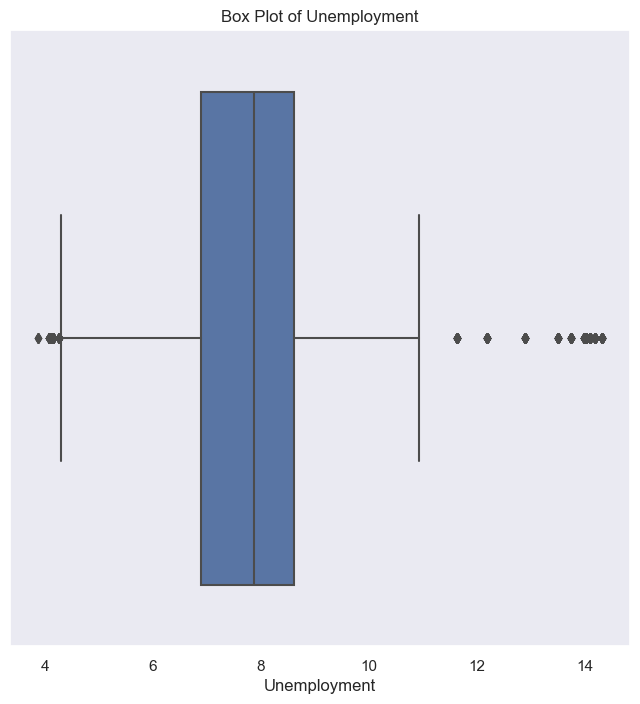

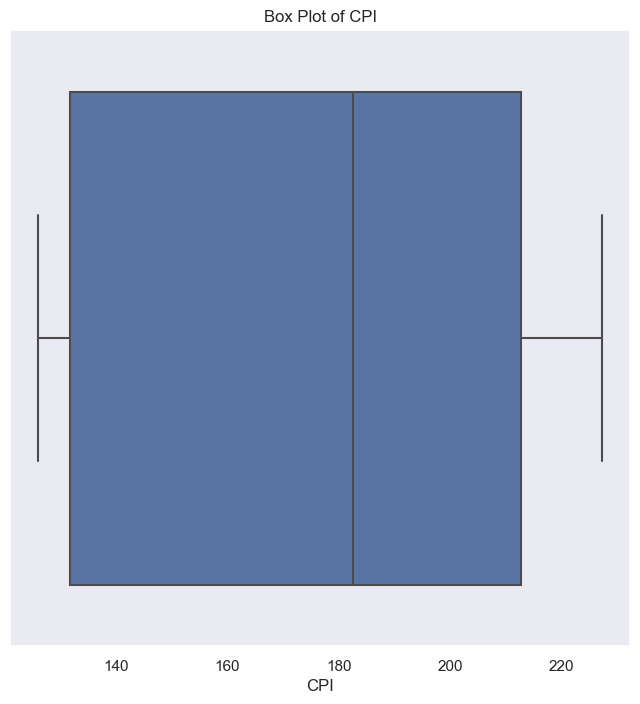

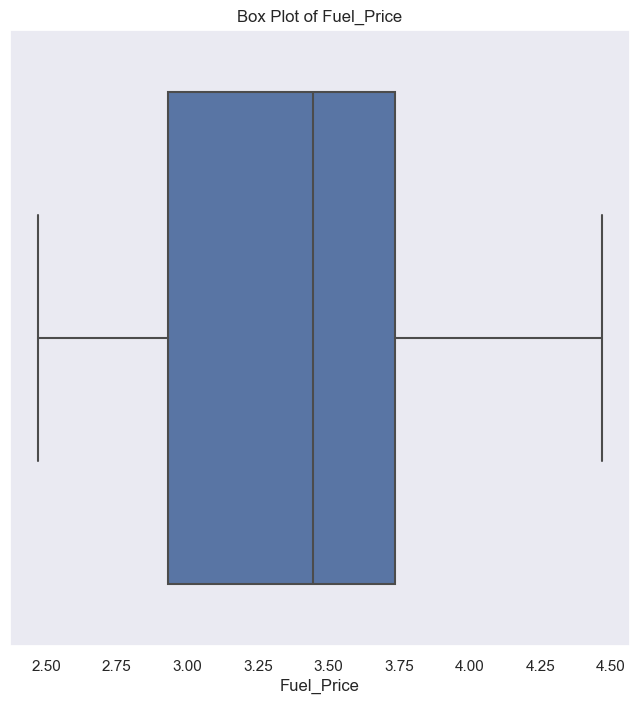

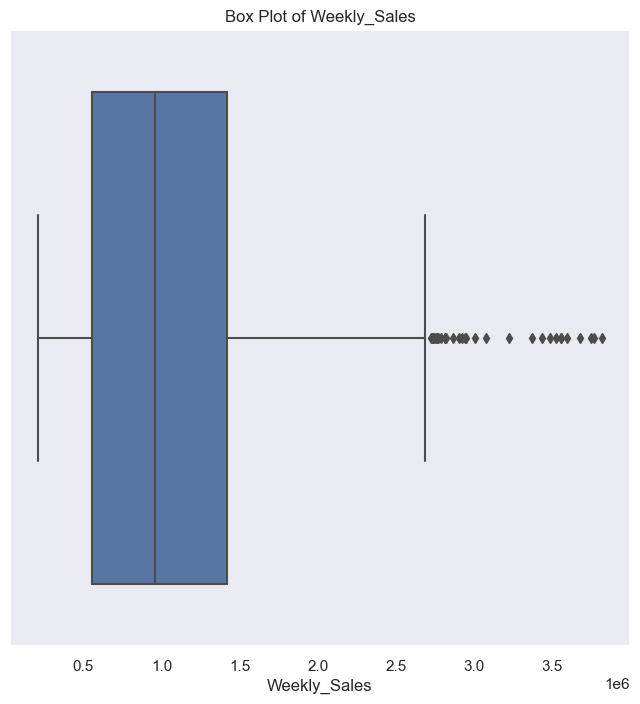

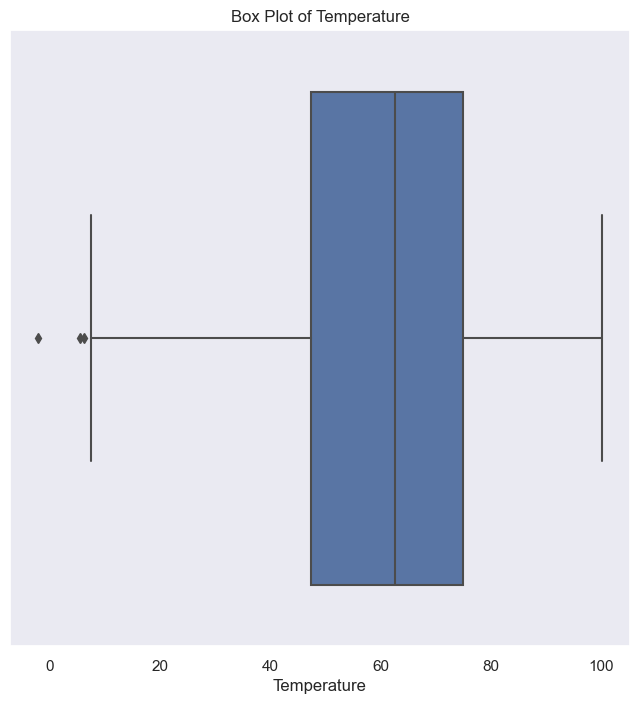

In [76]:
#i will use iqr for this task
selected_columns = ['Unemployment', 'CPI', 'Fuel_Price', 'Weekly_Sales', 'Temperature']

for col in selected_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()



## i use IQR for outlines

In [77]:
selected_columns = ['Unemployment', 'Weekly_Sales', 'Temperature']
for col in selected_columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    width=1.5
    lower=q1-(width*iqr)
    higher=q3+(width*iqr)
    df[col]=np.where(df[col]>higher,higher,np.where(df[col]<lower,lower,df[col]))

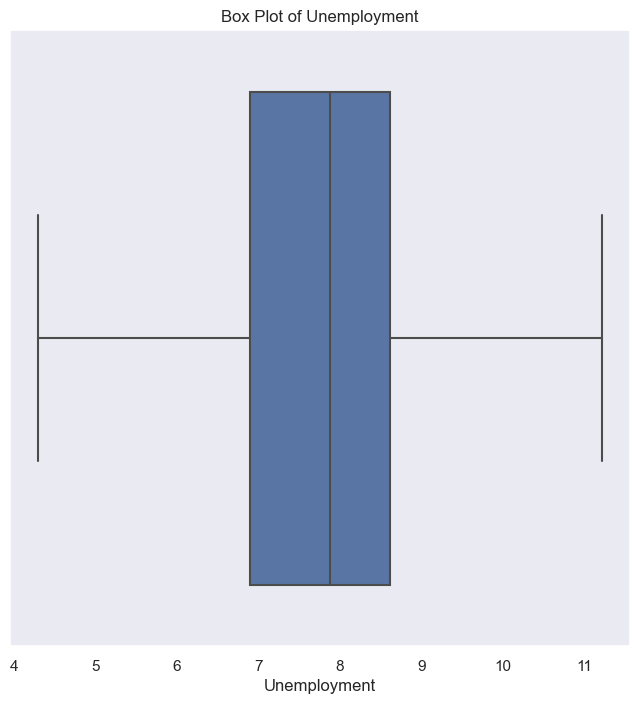

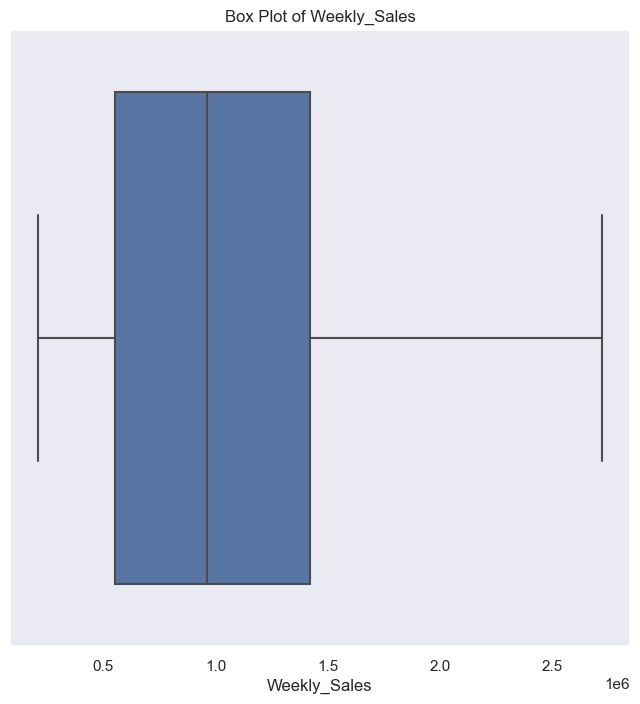

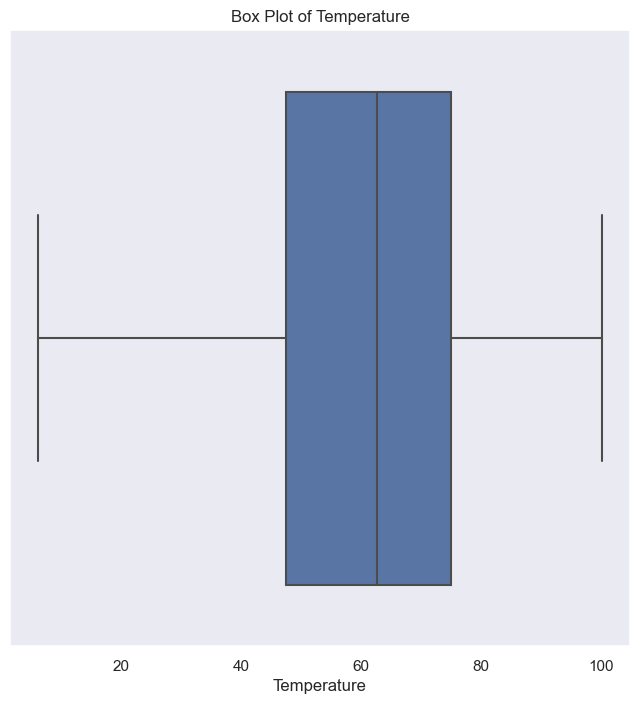

In [78]:
selected_columns = ['Unemployment', 'Weekly_Sales', 'Temperature']

for col in selected_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()



### now the data is cleanded now the next step i will add new colonm to help me in analysis and ans quation

In [79]:
"""
bins = [0, 3, 6, 9, 12] 

labels = ['Semester 1', 'Semester 2', 'Semester 3', 'Semester 4']

df['Semester'] = pd.cut(df['Date'].dt.month, bins=bins, labels=labels)
"""


semester_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df['Semester'] = df['Date'].dt.month.map(semester_map)

print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment Semester  
0     211

### this is two ways by visualizing data or with code

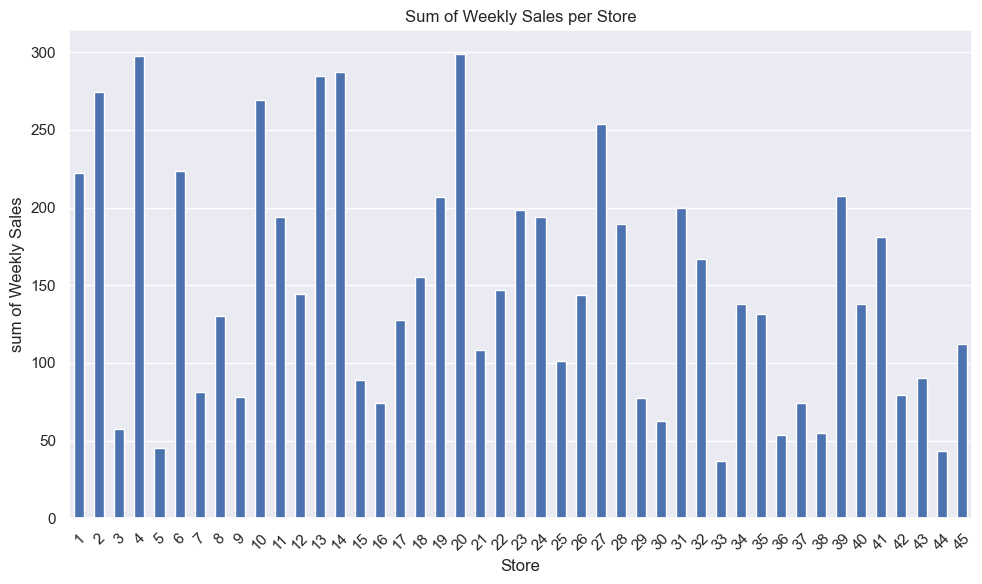

In [80]:
sales_sum = df.groupby('Store')['Weekly_Sales'].sum() / 1000000


plt.figure(figsize=(10, 6))
sales_sum.plot(kind='bar')
plt.ylabel('sum of Weekly Sales')
plt.title('Sum of Weekly Sales per Store')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### this mean 20 store have the max sales with 2.991m 

In [81]:
print(sales_sum.head(45))

max_store = sales_sum.idxmax()
max_value = sales_sum[max_store]

print("Store", max_store, "has the maximum sales of", max_value, "M")


Store
1     222.402809
2     274.162806
3      57.586735
4     297.357454
5      45.475689
6     223.748927
7      81.598275
8     129.951181
9      77.789219
10    269.280735
11    193.962787
12    144.287230
13    284.524699
14    287.009071
15     89.133684
16     74.252425
17    127.782139
18    155.114734
19    206.634862
20    299.066335
21    108.117879
22    147.075649
23    198.736712
24    194.016021
25    101.061179
26    143.416394
27    253.479478
28    189.263681
29     77.141554
30     62.716885
31    199.613905
32    166.819246
33     37.160222
34    138.249763
35    131.520672
36     53.412215
37     74.202740
38     55.159626
39    207.445542
40    137.870310
41    181.341935
42     79.565752
43     90.565435
44     43.293088
45    112.395341
Name: Weekly_Sales, dtype: float64
Store 20 has the maximum sales of 299.0663352575 M


# b)	Which store has maximum standard deviation i.e., the sales vary a lot

In [82]:
sales_std = df.groupby('Store')['Weekly_Sales'].std()
print(sales_std.head(45))  

max_storestd = sales_std.idxmax()
max_valuestd = sales_std[max_storestd]

print("Store", max_storestd, "standard deviation of", max_valuestd.round(2))


Store
1     155980.767761
2     193325.941429
3      46319.631557
4     199301.119778
5      37737.965745
6     212248.956163
7     112585.469220
8     106280.829881
9      69028.666585
10    227376.298071
11    165833.887863
12    139166.871880
13    199157.629439
14    263225.819638
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    206697.618299
21    128752.812853
22    161251.350631
23    249263.130205
24    167745.677567
25    112976.788600
26    110431.288141
27    227253.962225
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64
Store 14 standard deviation of 263225.82


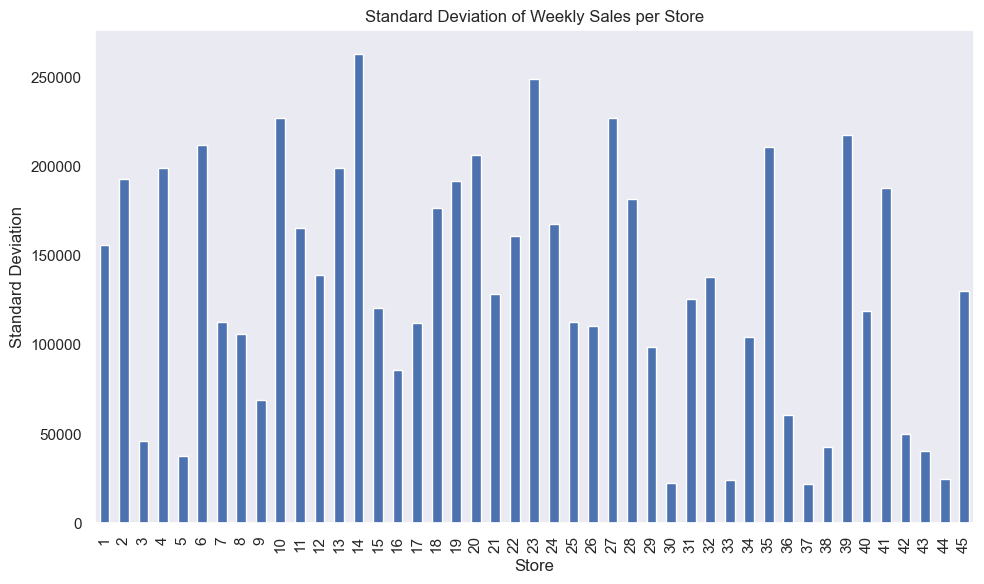

In [83]:

plt.figure(figsize=(10, 6))
sales_std.plot(kind='bar')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Weekly Sales per Store')
plt.tight_layout()
plt.show()

# c)	Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.

In [84]:
holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean() 
print("Mean of the non holiday sales : ",holiday[0].round(2))

high_sales = df[df['Holiday_Flag'] ==1][df[df['Holiday_Flag'] ==1]['Weekly_Sales'] >holiday[0]]

num = len(high_sales)

print("Number of rows in the DataFrame:", num)
print(high_sales['Date'].unique())


Mean of the non holiday sales :  1039420.98
Number of rows in the DataFrame: 220
<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]


# d)	Provide a monthly and semester view of sales in units and give insights.

Month 1:  $332,598,438
Month 2:  $568,727,890
Month 3:  $592,785,901
Month 4:  $646,859,785
Month 5:  $557,125,572
Month 6:  $622,629,887
Month 7:  $650,000,977
Month 8:  $613,090,209
Month 9:  $578,761,179
Month 10:  $584,784,788
Month 11:  $411,544,604
Month 12:  $565,853,793
Semester Fall: $1,575,090,571
Semester Spring: $1,796,771,258
Semester Summer: $1,885,721,073
Semester Winter: $1,467,180,122


array([<Axes: title={'center': 'Weekly_Sales'}, xlabel='Semester'>],
      dtype=object)

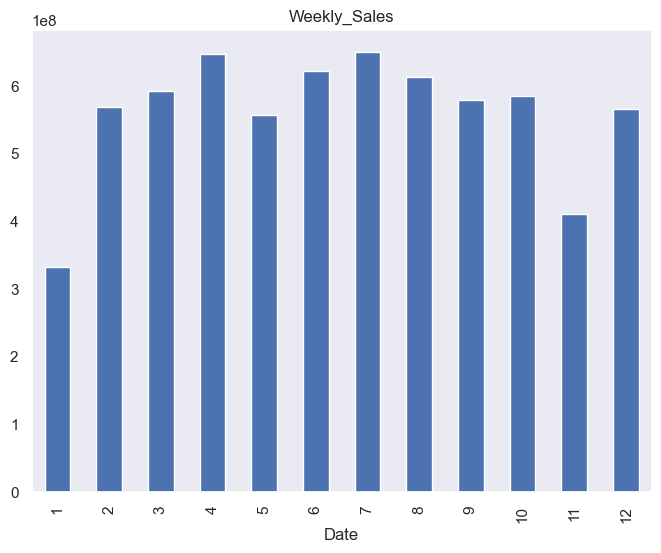

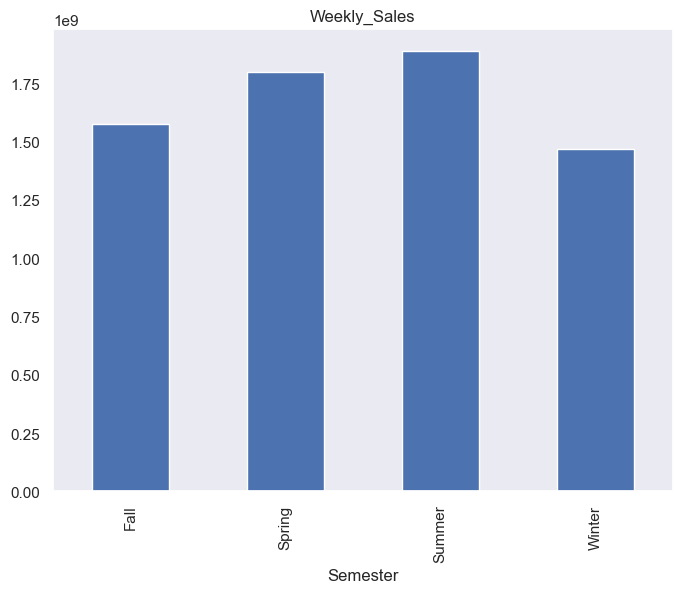

In [85]:
# monthly_sales = (df.groupby([df['Date'].dt.year, df['Date'].dt.month])['Weekly_Sales'].sum()).round(2)
monthly_sales = (df.groupby(df['Date'].dt.month)['Weekly_Sales'].sum()).round(2)
semesterly_sales = (df.groupby('Semester')['Weekly_Sales'].sum()).round(2)

#for (year, month), sales in monthly_sales.items():
#    print(f"{year}-{month:02}: ${sales:,.0f}")

for month_index, sales in enumerate(monthly_sales, start=1):
    print(f"Month {month_index}:  ${sales:,.0f}")

for semester, sales in semesterly_sales.items():
    print(f"Semester {semester}: ${sales:,.0f}")
    
plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='bar', subplots=True)

plt.figure(figsize=(8, 6))
semesterly_sales.plot(kind='bar', subplots=True)


Text(0.5, 1.0, 'Weekly Sales with date ')

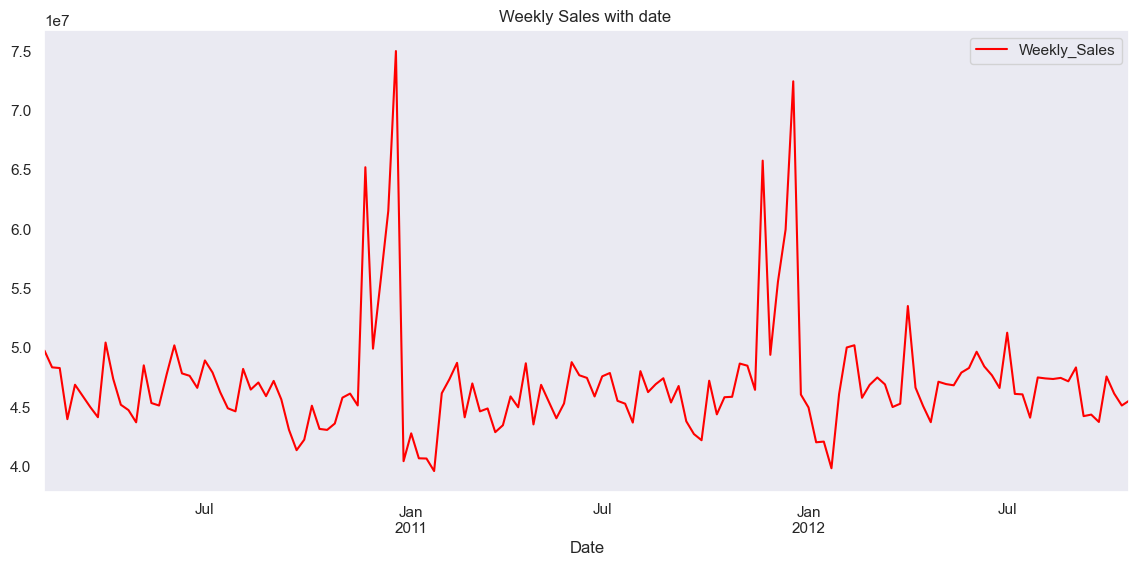

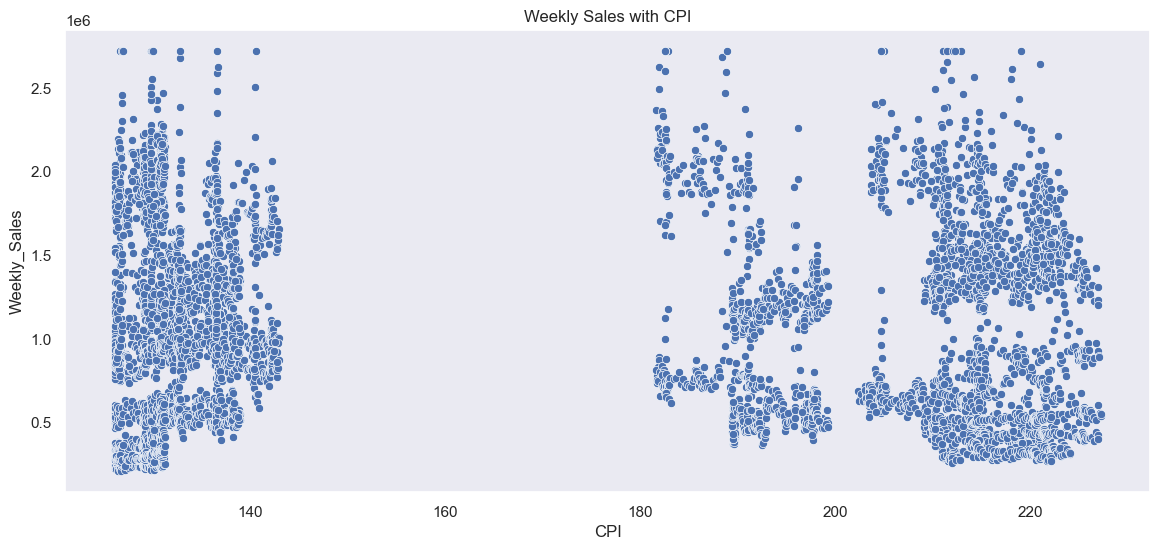

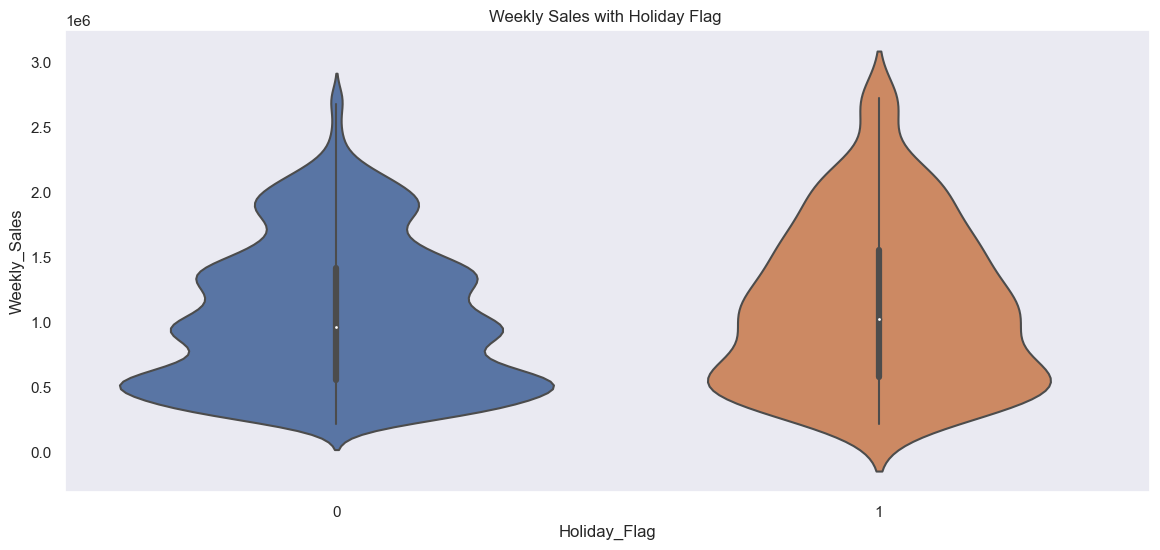

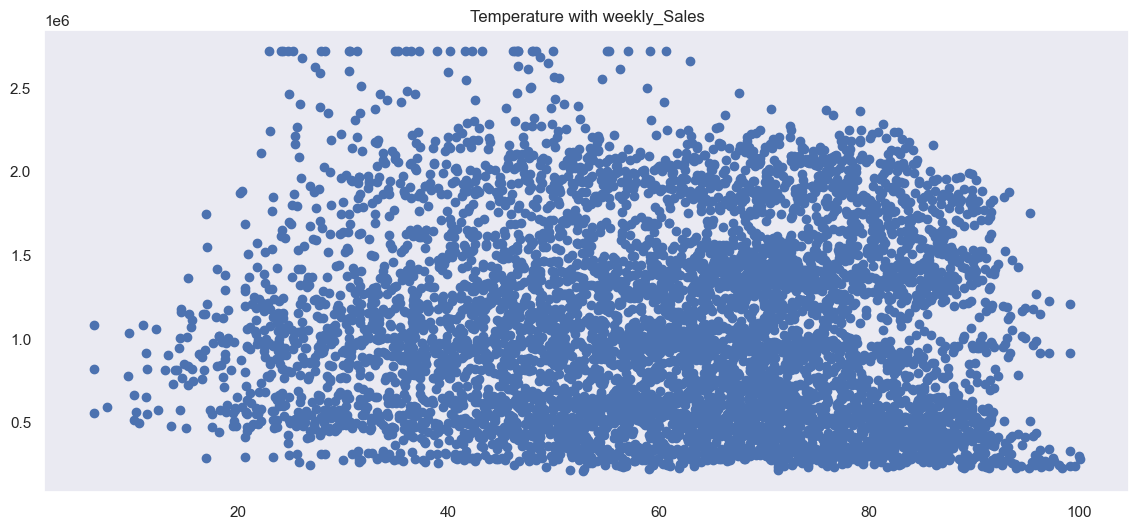

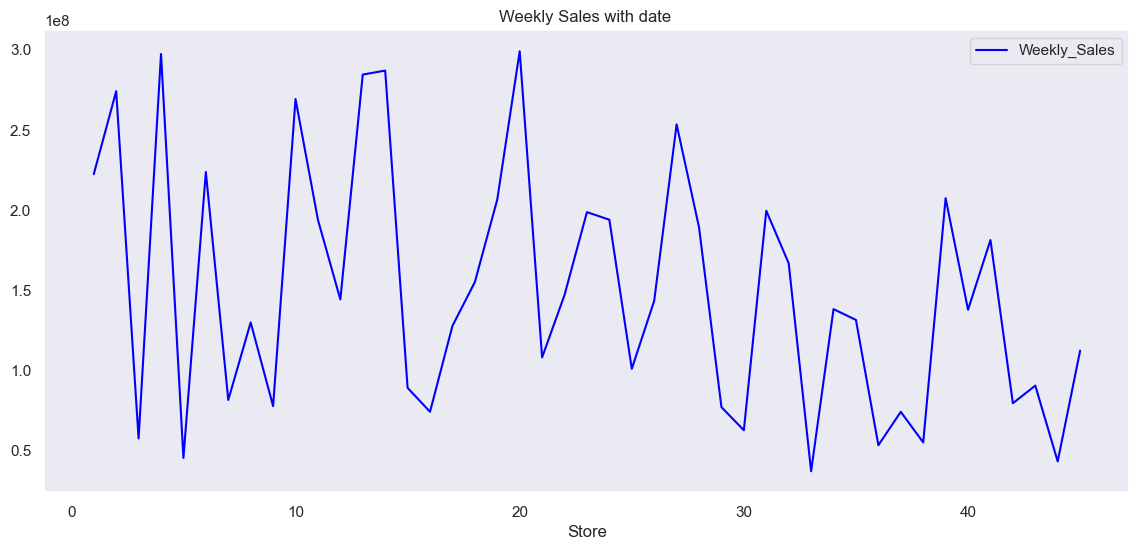

In [86]:
sales = df.groupby("Date")[["Weekly_Sales"]].sum()
sales.plot(color='red', figsize=(14, 6))
plt.title('Weekly Sales with date ')

plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title('Weekly Sales with CPI')

plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
plt.title('Weekly Sales with Holiday Flag ')

plt.figure(figsize = (14,6))
plt.scatter( df['Temperature'] ,df['Weekly_Sales'] )
plt.title("Temperature with weekly_Sales")

sales_store = df.groupby("Store")[["Weekly_Sales"]].sum()
sales_store.plot(color='blue', figsize=(14, 6))
plt.title('Weekly Sales with date ')


# addition part

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

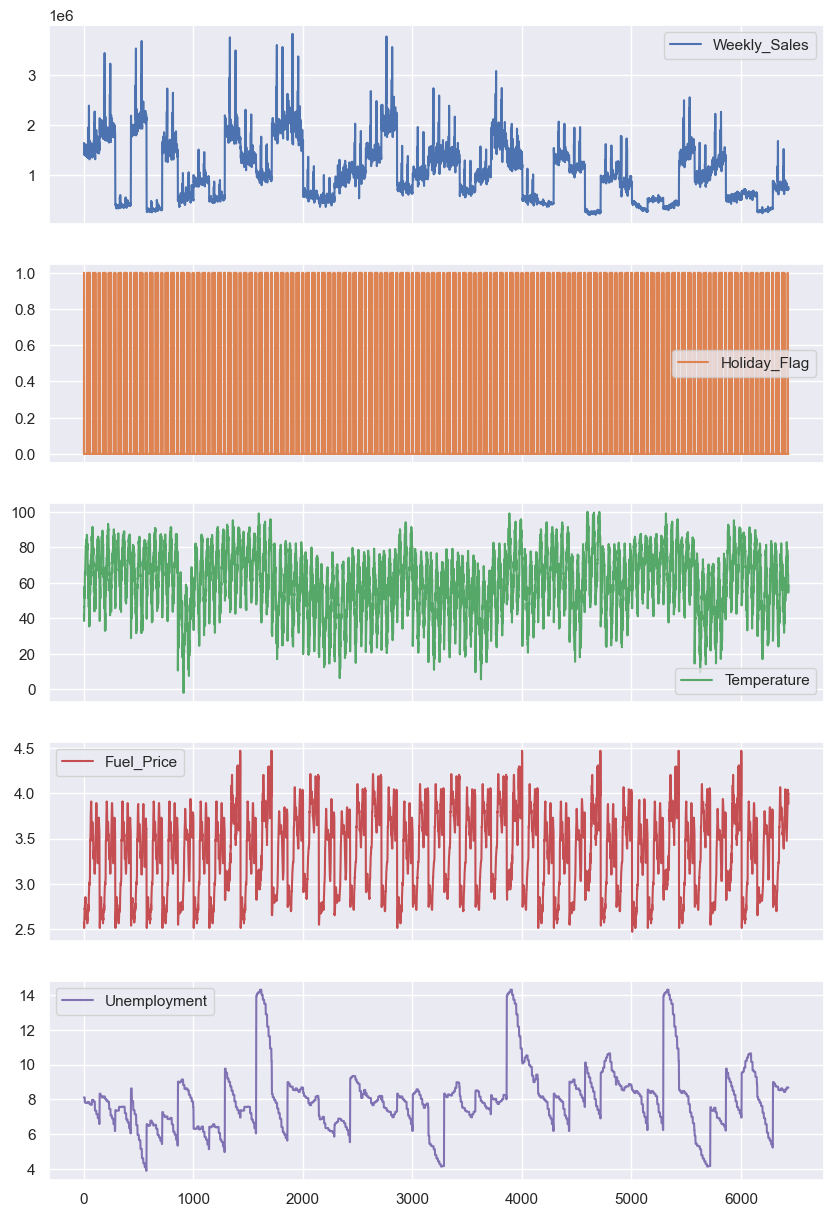

In [87]:
selecte_col.plot(subplots=True, grid=True, figsize=(10,15))

Text(0.5, 1.0, 'Temperature with weekly_Sales')

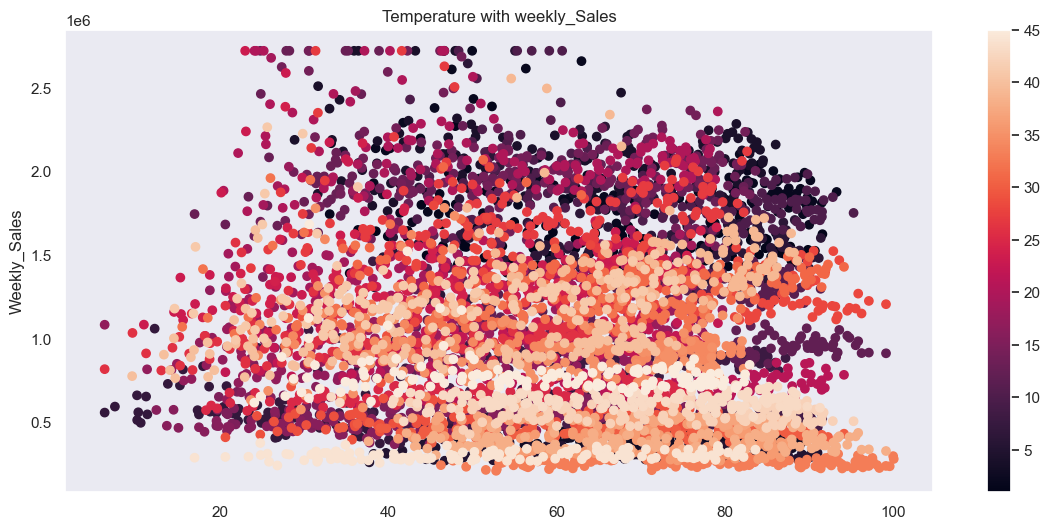

In [88]:
plt.figure(figsize = (14,6))
sns.set(style='dark')
plt.scatter( df['Temperature'] ,df['Weekly_Sales'] , c = df['Store'])
plt.colorbar()
plt.ylabel("Weekly_Sales")
plt.title("Temperature with weekly_Sales")

## Correlation between Columns 

Text(0.5, 1.0, 'Correlation Heatmap')

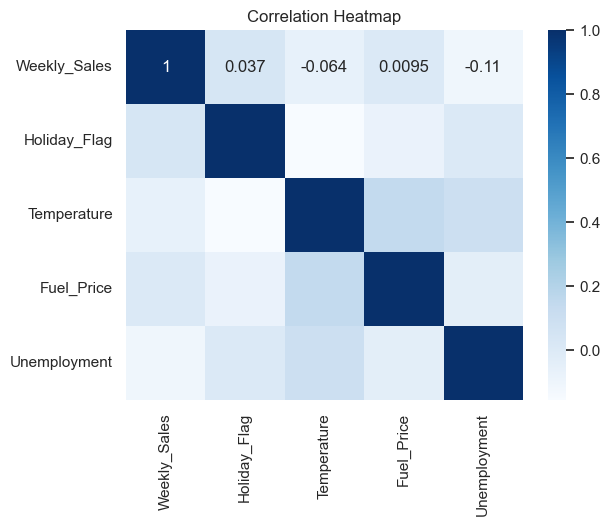

In [89]:


sns.heatmap(selecte_col.corr(), annot=True, cmap="Blues")
plt.title('Correlation Heatmap')
